## Determine the breed of a dog in an image


In [23]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from shutil import move
from tensorflow.keras.utils import plot_model
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import shutil
import glob

In [1]:

len(glob.glob("C:/Users/soume/300_HOUR/train/*.jpg"))

10222

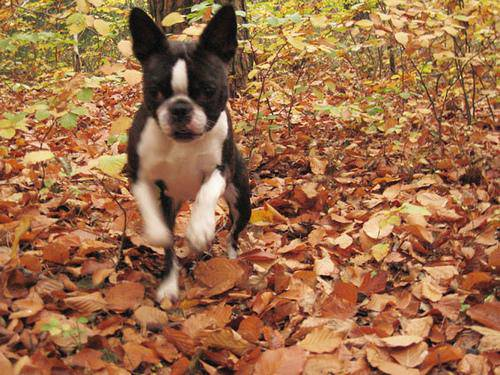

In [2]:
from IPython.display import display, Image
display(Image(filename='C:/Users/soume/300_HOUR/train/000bec180eb18c7604dcecc8fe0dba07.jpg'))

In [3]:
len(glob.glob("C:/Users/soume/300_HOUR/test/*.jpg"))

10357

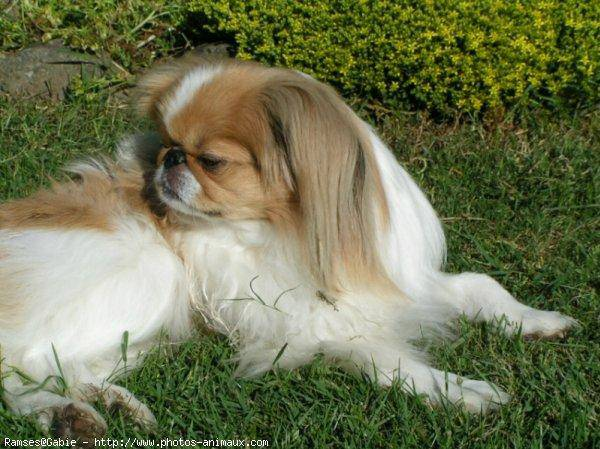

In [4]:
from IPython.display import display, Image
display(Image(filename='C:/Users/soume/300_HOUR/test/000621fb3cbb32d8935728e48679680e.jpg'))

In [5]:
import pandas as pd
labels = pd.read_csv("labels.csv")
print(labels.head(5))
print(len(labels))
print(labels["breed"].value_counts())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
10222
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64


In [6]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,4525a9d3efa4271d719e66855183b571,scottish_deerhound
freq,1,126


In [7]:
breeds=labels.groupby('breed')

In [8]:
# Alphabetically sorting labels and putting it into a list 
classes = sorted(list(set(labels['breed'])))
n_classes = len(classes)  # no of unique breeds
print("Total unique breed: {}".format(n_classes))

Total unique breed: 120


In [9]:
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [10]:

len(os.listdir('C:/Users/soume/300_HOUR/test'))

10357

##  Making file of different class

In [37]:
os.mkdir('dogbreeds_in')
os.mkdir('dogbreeds_in/train')
os.mkdir('dogbreeds_in/validation')

In [38]:
for breed,group in breeds:
    files = list(group['id'])
    ln = len(files)
    train_p = 'dogbreeds_in/train/'+breed
    val_p = 'dogbreeds_in/validation/'+breed
    os.mkdir(train_p)
    os.mkdir(val_p)
    for ind,fn in enumerate(files):
        fn_path = 'C:/Users/soume/300_HOUR/train/' + fn + '.jpg'
        if ind<ln:
            tar_path = train_p +'/'+ fn + '.jpg'
            copyfile(fn_path,tar_path)
        
    for ind,fn in enumerate(files):
        fn1_path = 'C:/Users/soume/300_HOUR/test/' + fn + '.jpg'
        if ind<ln:
            tar1_path = val_p  +'/'+ fn + '.jpg'
            copyfile(fn1_path,tar1_path)
        
        
        
            

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/soume/300_HOUR/test/00ca18751837cd6a22813f8e221f7819.jpg'

In [25]:
split_size = 0.7
for breed,group in breeds:
    files = list(group['id'])
    ln = len(files)
    train_p = 'dogbreeds_in/train/'+breed
    val_p = 'dogbreeds_in/validation/'+breed
    os.mkdir(train_p)
    os.mkdir(val_p)
    random.shuffle(files)
    for ind,fn in enumerate(files):
        fn_path = 'C:/Users/soume/300_HOUR/train/' + fn + '.jpg'
        if ind<split_size*ln:
            tar_path = train_p +'/'+ fn + '.jpg'
            copyfile(fn_path,tar_path)
        else:
            tar_path = val_p  +'/'+ fn + '.jpg'
            copyfile(fn_path,tar_path)

In [ ]:
"""
for i in glob.glob("C:/Users/soume/300_HOUR/train/*.jpg"):
    print(i)
"""             

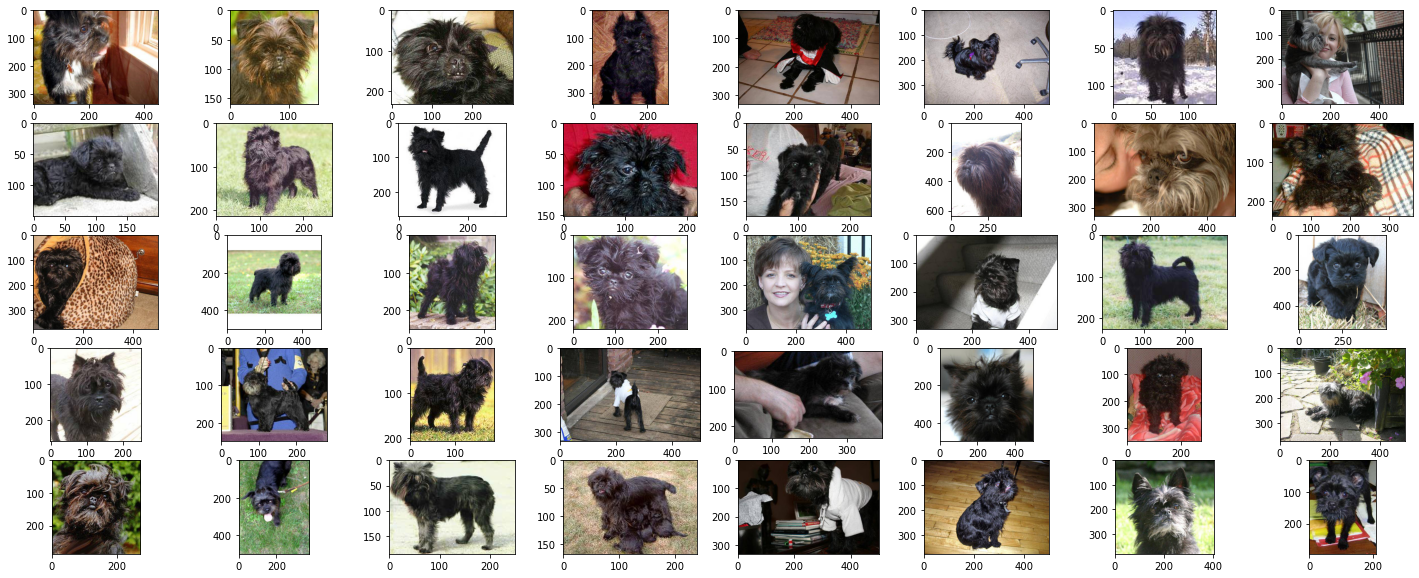

In [26]:
import IPython.display as display
import matplotlib.pyplot as plt
import PIL
import PIL.Image

train_data=list(glob.glob("C:/Users/soume/300_HOUR/dogbreeds_in/train/affenpinscher/*.jpg"))
#Visualize train images
plt.figure(figsize=(25, 10))
for i in range(40):
    plt.subplot(5, 8, i + 1)
    plt.imshow(PIL.Image.open(train_data[i]))
plt.show()



In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,  BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [28]:
# Dimension of our images.
img_width, img_height = 300, 300

#Setting up the directories
train_data_dir = 'C:/Users/soume/300_HOUR/dogbreeds_in/train'
validation_data_dir = 'C:/Users/soume/300_HOUR/dogbreeds_in/validation'

#Setting up the batchsizes.
nb_train_samples = 10222
nb_validation_samples = 10357
epochs = 2
batch_size = 16
input_shape = (img_width, img_height, 3)

In [29]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

#this generates batches of augment data for training
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    color_mode='rgb',
    class_mode = 'categorical',
    batch_size=batch_size
    )

Found 7213 images belonging to 120 classes.


In [30]:
# this is the augmentation configuration we will use for validating
val_datagen = ImageDataGenerator(rescale=1./255)

#this generates batches of augment data for validating
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    color_mode='rgb',
    class_mode = 'categorical',
    batch_size=batch_size
    )

Found 3009 images belonging to 120 classes.


In [31]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


#configuring the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#to print a summary representation of your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 298, 298, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 147, 147, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0

In [32]:
model=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
192/638 [========>.....................] - ETA: 35:54 - loss: 1.1921e-07 - accuracy: 0.4938

KeyboardInterrupt: 

In [ ]:
#to save the weights in the model as a HDF file
#model.save_weights('dog_breed.h5')

In [ ]:
#to save the architecture of the model as a json file

#with open('dog_breed.json','w') as f:
 #   f.write(model.to_json())